In [ ]:
# Task 1

In [1]:

import pandas as pd

# Load Iris dataset using pandas from sklearn
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Display the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Check data types and shape
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [4]:
# Drop or fill missing values if found
df_cleaned = df.dropna()  

In [ ]:
# Task 2

In [5]:
df_cleaned.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
grouped_means = df_cleaned.groupby('species').mean()
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
# Median of numerical columns
df_cleaned.median(numeric_only=True)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [8]:
# Standard deviation of numerical columns
df_cleaned.std(numeric_only=True)

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [ ]:
### Patterns and Interesting Findings

- **Setosa** species has the **smallest petal length and width** among all three species.
- **Virginica** generally has the **largest sepal and petal measurements**, especially petal length.
- **Versicolor** lies between Setosa and Virginica in most numerical measurements.
- **Petal length (cm)** is a strong differentiator and varies significantly across species.
- **Sepal width (cm)** shows the **least variation** and is less useful for distinguishing species.
- **Setosa** is easily separable due to **non-overlapping petal dimensions** with other species.
- There is a **positive correlation** between **sepal length** and **petal length**, especially in Virginica and Versicolor.


In [ ]:
# Task 3

In [ ]:
## Line Chart

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


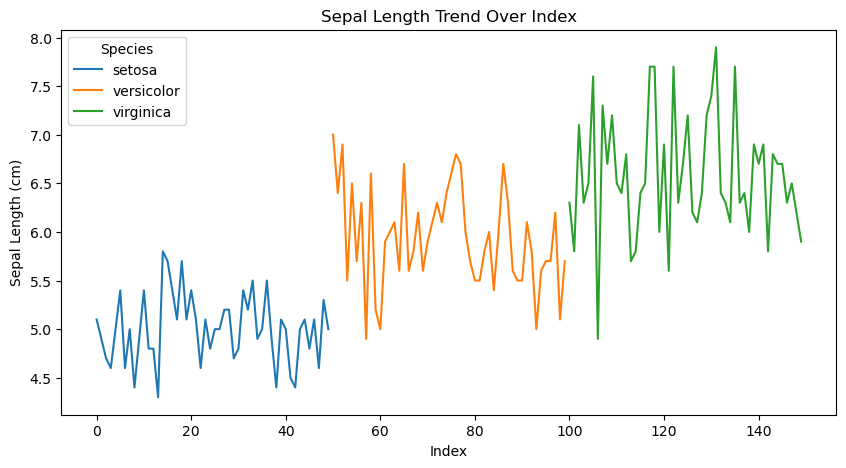

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a trend using index values
df_cleaned['index'] = df_cleaned.index
plt.figure(figsize=(10,5))
sns.lineplot(data=df_cleaned, x='index', y='sepal length (cm)', hue='species')
plt.title('Sepal Length Trend Over Index')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend(title='Species')
plt.show()

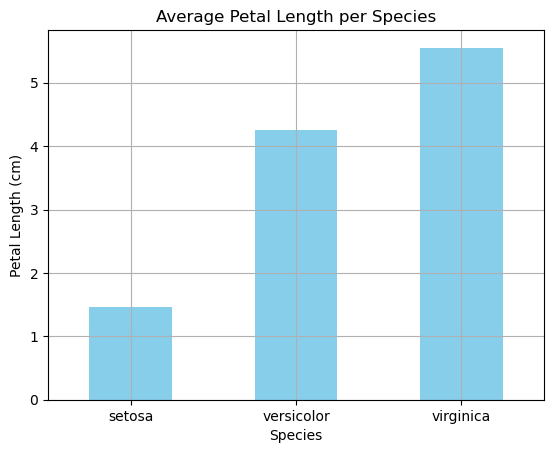

In [10]:
## Bar Chart
grouped_means['petal length (cm)'].plot(kind='bar', color='skyblue')
plt.title('Average Petal Length per Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

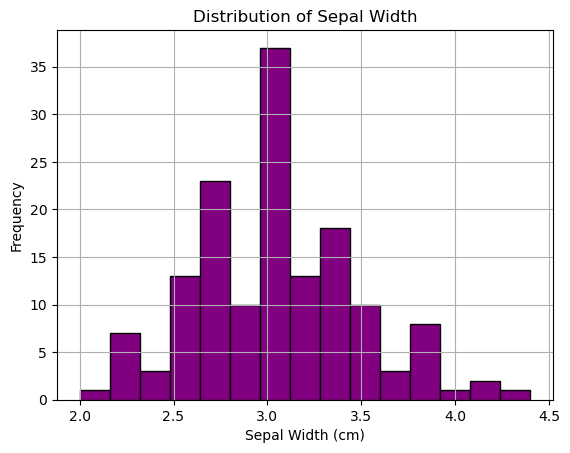

In [11]:
## Histogram
plt.hist(df_cleaned['sepal width (cm)'], bins=15, color='purple', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

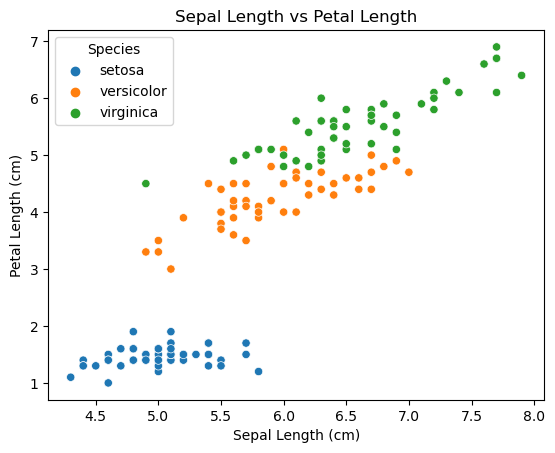

In [12]:
## Scatter Plot
sns.scatterplot(data=df_cleaned, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()